In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

In [2]:
df = dt.fread('dataset/train.csv').to_pandas()

In [3]:
df.shape

(1460, 81)

In [4]:
na_cols = df.columns[df.isna().any()].to_list()

In [5]:
df[na_cols].isna().sum()/df.shape[0]*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [6]:
df.iloc[:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


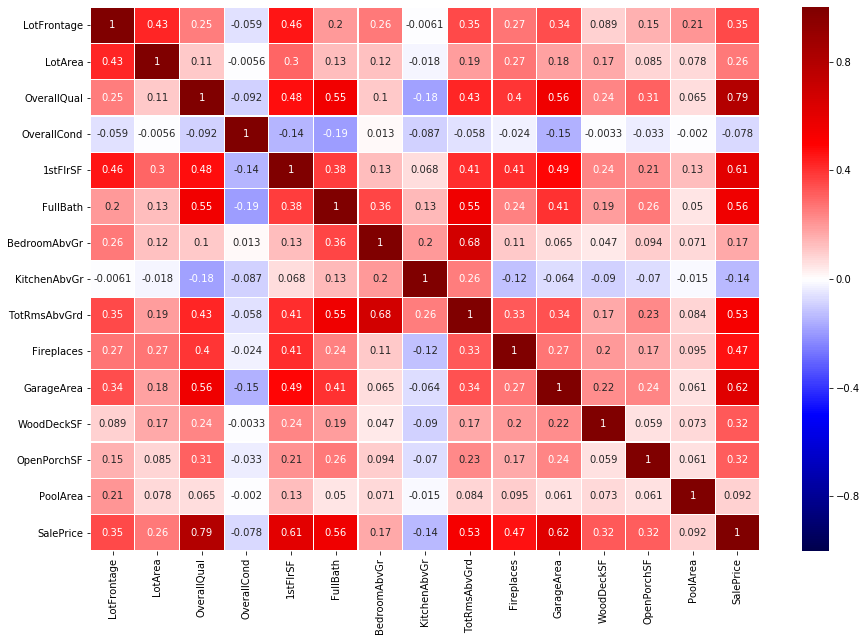

In [7]:
columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'SalePrice']

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df[columns].corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True, ax=ax)
ylim = ax.set_ylim(15, 0)

- Positive Correlation: The most positive correlation is between OverallQuality and SalePrice meaning that Sale Price increases as Overall Qaulity of the house increases. This correlation also makes sense because the price of the house will depend on the Overall Quality of the house to some extent.
- Negative Correlation: The most negative correlation observed is between OverallCondition and number of FullBaths. The correlation shows that the Overall Condition of the house increases as the number of Full Baths in the house decrease. This seems to be a strange correlation and does not necessarily appear to be a causation. It is possible that the higher number of full baths causes cleanliness issues reducing the overall condition of the house.

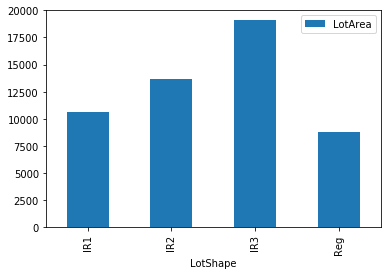

In [8]:
ax = df[['LotArea', 'LotShape']].groupby(['LotShape']).median().plot(kind='bar')

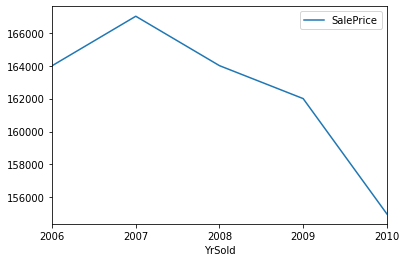

In [9]:
ax = df[['YrSold', 'SalePrice']].groupby(['YrSold']).median().plot()
ax.set_xticks(np.delete(ax.get_xticks(), [1, 3, 5, 7]))

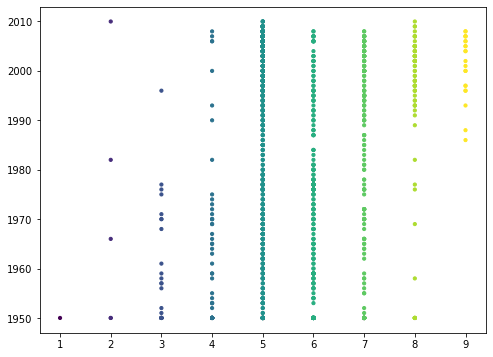

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df['OverallCond'], df['YearRemodAdd'], s=10, c=df['OverallCond'])

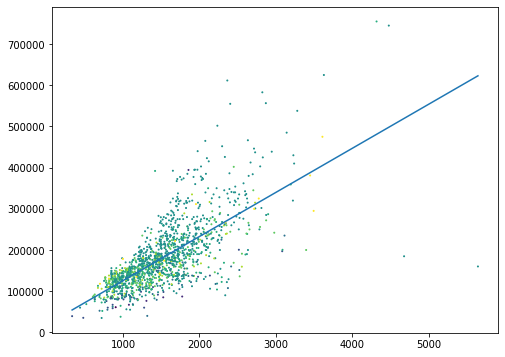

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'], s=1, c=df['OverallCond'])
plt.plot(np.unique(df['GrLivArea']), np.poly1d(np.polyfit(df['GrLivArea'], df['SalePrice'], 1))(np.unique(df['GrLivArea'])))

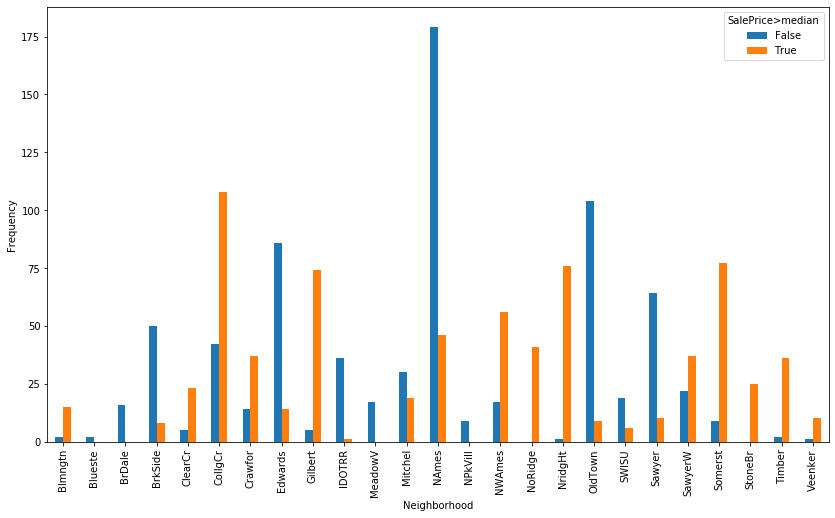

In [12]:
fig, ax = plt.subplots(figsize=(14,8))
pd.crosstab(df.Neighborhood, df['SalePrice'] > df.SalePrice.median()).plot(kind='bar', ax=ax)
plt.legend(title='SalePrice>median')
ylabel = ax.set_ylabel('Frequency')

In [64]:
from sklearn import preprocessing

landslope_map = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}

scoring_columns = ['LandSlope', 'ExterQual', 'ExterCond', 'LotArea', 'OverallQual', 'OverallCond', 
                   'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 
                   'GarageArea', 'PoolArea', 'SalePrice']
scaled_df = df.copy()
scaled_df['LandSlope'] = scaled_df['LandSlope'].map(landslope_map)
scaled_df['ExterQual'] = scaled_df['ExterQual'].map(qual_map)
scaled_df['ExterCond'] = scaled_df['ExterCond'].map(qual_map)

In [66]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(scaled_df[scoring_columns])
scaled_df = pd.DataFrame(scaled_df, columns=scoring_columns)

In [85]:
weights = {'LandSlope': 1, 'ExterQual': 1.1, 'ExterCond': 1.1, 'LotArea': 1.2, 'OverallQual': 2, 
           'OverallCond': 2, 'YearRemodAdd': 1.5, 'TotalBsmtSF': 0.8, 'GrLivArea': 1.5, 'FullBath': 1, 
           'TotRmsAbvGrd': 1, 'Fireplaces': 0.5, 'GarageArea': 1, 'PoolArea': 0.5, 'SalePrice': -1.5}

def scoring_function(row):
    score = 0
    for col, val in row.items():
        score += val * weights[col]
    return score

In [86]:
scaled_df['score'] = scaled_df.apply(scoring_function, axis=1)

In [89]:
ten_most_desireable_houses = scaled_df.nlargest(10, 'score')
ten_least_desireable_houses = scaled_df.nsmallest(10, 'score')

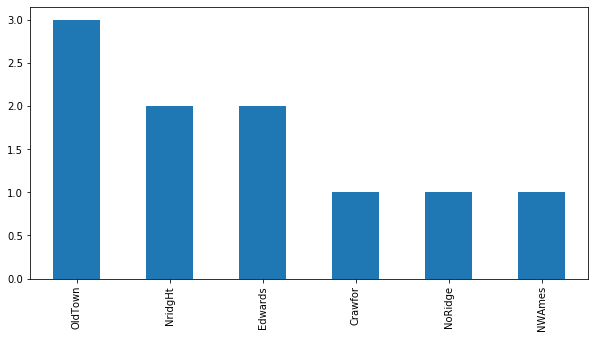

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
df.iloc[ten_most_desireable_houses.index]['Neighborhood'].value_counts().plot(kind='bar')

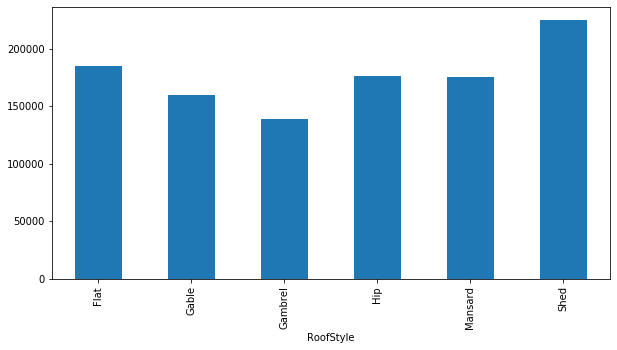

In [125]:
fig, ax = plt.subplots(figsize=(10,5))
df.groupby(['RoofStyle'])['SalePrice'].median().plot(kind='bar', ax=ax)

In [406]:
# Map categorical names to correspoding ordinal values
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'NA': 0}

# List of columns to be used for distance function
distance_columns = ['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 
                    'KitchenAbvGr', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 
                    'Fireplaces', 'GarageArea', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 
                    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
categorical_cols = ['Street', 'LotShape', 'LandSlope', 'BldgType']

distance_df = df[distance_columns].copy()
categorical_df = df[categorical_cols].copy()

In [407]:
from sklearn import preprocessing

# Scale the values from 0 to 1 using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(distance_df)
scaled_df = pd.DataFrame(scaled_values, columns=distance_columns)

In [408]:
distance_df = pd.concat([scaled_df, categorical_df], axis=1)

In [409]:
# One hot encoding for categorical columns
for categorical_col in distance_df.select_dtypes(include=['object']).columns:
    distance_df[categorical_col] = pd.Categorical(distance_df[categorical_col])
distance_df = pd.get_dummies(distance_df)

In [410]:
distance_df

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,...,LotShape_IR3,LotShape_Reg,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,0.033420,0.140098,0.119780,0.413559,0.375,0.333333,0.259231,0.666667,0.5,0.500000,...,0,1,1,0,0,1,0,0,0,0
1,0.038795,0.206547,0.212942,0.000000,0.375,0.333333,0.174830,0.666667,0.0,0.333333,...,0,1,1,0,0,1,0,0,0,0
2,0.046507,0.150573,0.134465,0.419370,0.375,0.333333,0.273549,0.666667,0.5,0.333333,...,0,0,1,0,0,1,0,0,0,0
3,0.038561,0.123732,0.143873,0.366102,0.375,0.333333,0.260550,0.333333,0.0,0.416667,...,0,0,1,0,0,1,0,0,0,0
4,0.060576,0.187398,0.186095,0.509927,0.500,0.333333,0.351168,0.666667,0.5,0.583333,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.030929,0.155974,0.142038,0.336077,0.375,0.333333,0.247362,0.666667,0.5,0.416667,...,0,1,1,0,0,1,0,0,0,0
1456,0.055505,0.252373,0.399036,0.000000,0.375,0.333333,0.327619,0.666667,0.0,0.416667,...,0,1,1,0,0,1,0,0,0,0
1457,0.036187,0.188543,0.195961,0.557869,0.500,0.333333,0.377920,0.666667,0.0,0.583333,...,0,1,1,0,0,1,0,0,0,0
1458,0.039342,0.176432,0.170721,0.000000,0.250,0.333333,0.140166,0.333333,0.0,0.250000,...,0,1,1,0,0,1,0,0,0,0


In [411]:
distance_mat = distance_df.values

norm = (distance_mat.T * distance_mat.T).sum(0, keepdims=True) ** .5

similarities = distance_mat @ distance_mat.T

similarities = similarities / norm / norm.T

In [412]:
np.argsort(similarities, axis=0)[-2]

array([1240,  780, 1167, ...,  852,  677, 1295])

In [413]:
unique_elements, counts_elements = np.unique(np.argsort(similarities, axis=0)[0], return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  52  335  375  533  582  812  954 1337 1405]
 [1270   81   12    1   49   43    2    1    1]]


In [414]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(distance_mat)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.012s...
[t-SNE] Computed neighbors for 1460 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 0.234840
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.240120
[t-SNE] KL divergence after 300 iterations: 0.598695


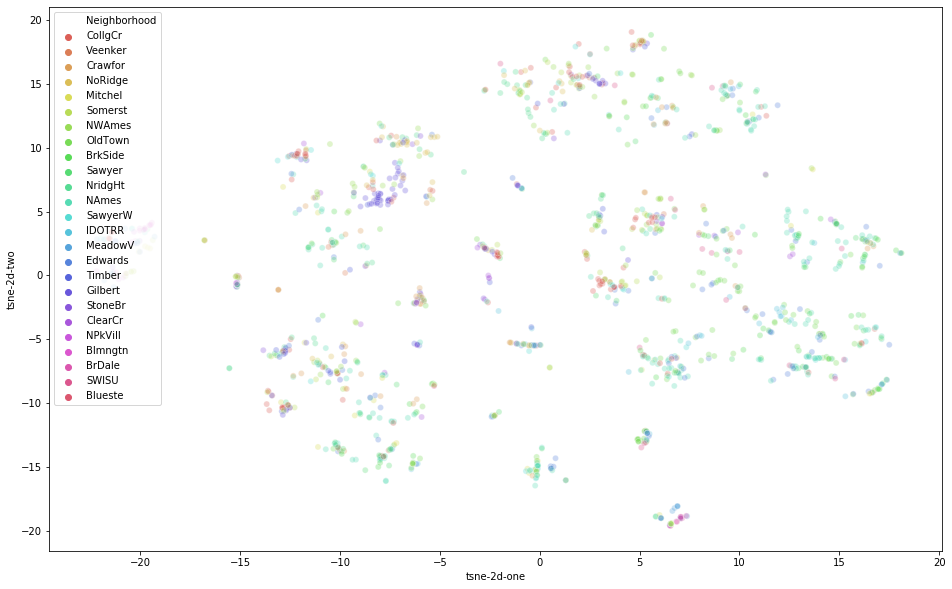

In [415]:
tsne_df = df.copy()

tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Neighborhood",
    palette=sns.color_palette("hls", n_colors=len(tsne_df.Neighborhood.value_counts())),
    data=tsne_df,
    legend="full", 
    alpha=0.3
)

In [340]:
# Map categorical names to correspoding ordinal values
qual_map = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, 'NA': 0}

# List of columns to be used for distance function
distance_columns = ['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 
                    'KitchenAbvGr', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 
                    'Fireplaces', 'GarageArea', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 
                    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
categorical_cols = ['Street', 'LotShape', 'LandSlope', 'BldgType']
quality_cols = ['ExterCond', 'ExterQual', 'BsmtCond', 'BsmtQual', 'HeatingQC', 'KitchenQual', 
                'FireplaceQu', 'GarageCond', 'GarageQual', 'OverallCond', 'OverallQual']

distance_df = df[distance_columns].copy()
categorical_df = df[categorical_cols].copy()
quality_df = df[quality_cols].copy()

In [341]:
for col in quality_cols[:-2]:
    quality_df[col] = quality_df[col].map(qual_map).fillna(0)
    
distance_df = pd.concat([distance_df, quality_df], axis=1)
distance_columns = distance_columns + quality_cols

In [342]:
from sklearn import preprocessing

# Scale the values from 0 to 1 using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(distance_df)
scaled_df = pd.DataFrame(scaled_values, columns=distance_columns)

In [343]:
distance_df = pd.concat([scaled_df, categorical_df], axis=1)

In [344]:
# One hot encoding for categorical columns
for categorical_col in distance_df.select_dtypes(include=['object']).columns:
    distance_df[categorical_col] = pd.Categorical(distance_df[categorical_col])
distance_df = pd.get_dummies(distance_df)

In [345]:
distance_mat = distance_df.values

norm = (distance_mat.T * distance_mat.T).sum(0, keepdims=True) ** .5

similarities = distance_mat @ distance_mat.T

similarities = similarities / norm / norm.T

In [390]:
np.unique(np.argsort(similarities, axis=0)[0], return_counts=True)

(array([  52,  335,  375,  533,  582,  812,  954, 1337, 1405]),
 array([1270,   81,   12,    1,   49,   43,    2,    1,    1]))

In [393]:
unique_elements, counts = np.unique(np.argsort(similarities, axis=0)[0], return_counts=True)
unique_elements = [str(i) for i in unique_elements]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=unique_elements, height=counts)
xticks = ax.set_xticks(unique_elements)

In [346]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(distance_mat)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.004s...
[t-SNE] Computed neighbors for 1460 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 0.349053
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.552895
[t-SNE] KL divergence after 300 iterations: 0.675224


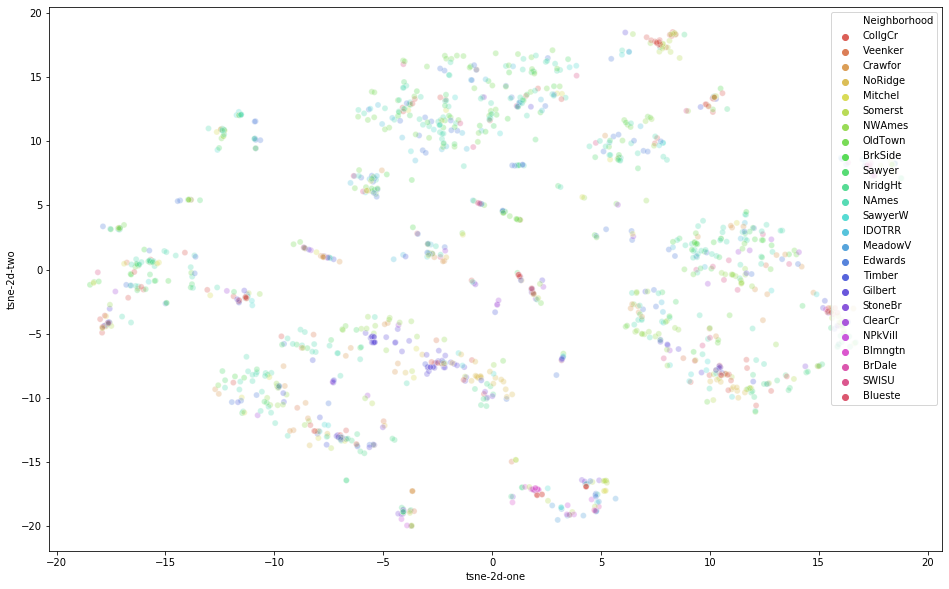

In [347]:
tsne_df = df.copy()

tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Neighborhood",
    palette=sns.color_palette("hls", n_colors=len(tsne_df.Neighborhood.value_counts())),
    data=tsne_df,
    legend="full", 
    alpha=0.3
)

In [455]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=20, affinity='precomputed', linkage='average')
house_clusters = cluster.fit(1.0 - similarities)

cluster_df = pd.concat([df.copy(), pd.DataFrame(house_clusters.labels_, columns=['cluster_label'])], axis=1)

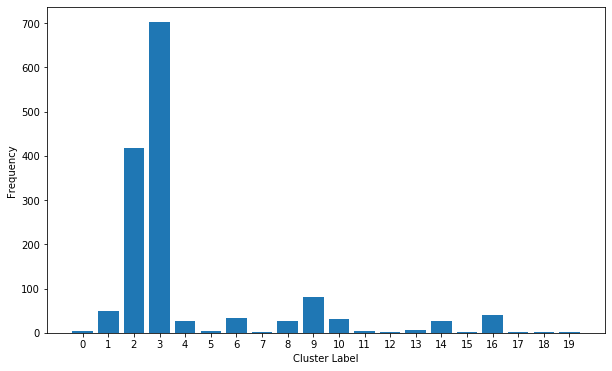

In [456]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x=cluster_df.cluster_label.value_counts().index, height=cluster_df.cluster_label.value_counts())
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Frequency')
xticks = ax.set_xticks(cluster_df.cluster_label.value_counts().index)

In [457]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(distance_mat)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.002s...
[t-SNE] Computed neighbors for 1460 samples in 0.138s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 0.234840
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.208374
[t-SNE] KL divergence after 300 iterations: 0.597805


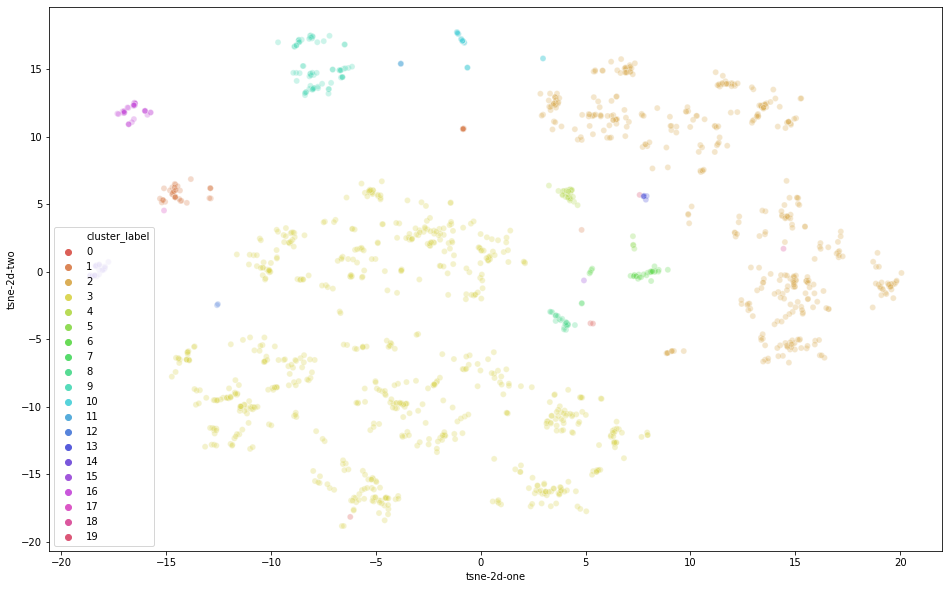

In [458]:
cluster_df['tsne-2d-one'] = tsne_results[:,0]
cluster_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_label",
    palette=sns.color_palette("hls", n_colors=len(cluster_df.cluster_label.value_counts())),
    data=cluster_df,
    legend="full", 
    alpha=0.3
)

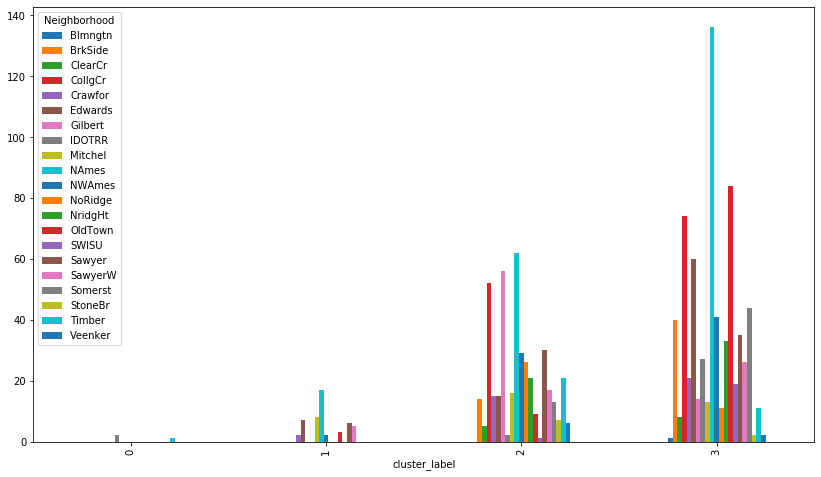

In [474]:
# Plot the frequency of Neighborhood for SalePrice > median
fig, ax = plt.subplots(figsize=(14,8))
filtered_cluster_df = cluster_df[cluster_df['cluster_label'] < 4]
pd.crosstab(filtered_cluster_df.cluster_label, filtered_cluster_df.Neighborhood).plot(kind='bar', ax=ax)
ylabel = ax.set_ylabel('Frequency')